In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, math, time, requests
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook

In [6]:
basics_url='https://datasets.imdbws.com/title.basics.tsv.gz'
akas_url='https://datasets.imdbws.com/title.akas.tsv.gz'
ratings_url='https://datasets.imdbws.com/title.ratings.tsv.gz'

In [7]:
basics = pd.read_csv(basics_url,sep='\t', low_memory=False)

In [8]:
akas = pd.read_csv(akas_url,sep='\t', low_memory=False)

In [9]:
ratings = pd.read_csv(ratings_url,sep='\t', low_memory=False)

In [10]:
basics = basics.replace({'\\N':np.nan}) 
akas = akas.replace({'\\N':np.nan}) 
ratings = ratings.replace({'\\N':np.nan}) 

In [11]:
basics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9063617 entries, 0 to 9063616
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 622.3+ MB


In [12]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"


In [13]:
basics['runtimeMinutes'].isna().sum()

6622619

In [14]:
basics= basics.dropna(subset=['runtimeMinutes'])

In [15]:
basics['runtimeMinutes'].isna().sum()

0

In [16]:
basics['genres'].isna().sum()

67057

In [17]:
basics=basics.dropna(subset=['genres'])

In [18]:
basics['genres'].isna().sum()

0

In [19]:
basics['titleType'].value_counts()

tvEpisode       1050345
short            569842
movie            364151
video            173981
tvMovie           87911
tvSeries          85930
tvSpecial         16290
tvMiniSeries      15853
tvShort            9347
videoGame           291
Name: titleType, dtype: int64

In [20]:
movie_filter= basics['titleType']!='movie'

In [21]:
basics= basics.drop(basics[movie_filter].index,inplace=False)

In [22]:
basics['titleType'].value_counts()

movie    364151
Name: titleType, dtype: int64

In [23]:
start_date= '2000'
end_date='2022'

In [24]:
after_start_date = basics['startYear'] >= start_date

In [25]:
before_end_date = basics['startYear'] <= end_date

In [26]:
between_two_dates = after_start_date & before_end_date

In [27]:
filtered_dates = basics.loc[between_two_dates]

In [28]:
filtered_dates

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
13082,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,NaN,133,Documentary
34805,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61119,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
66339,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006,NaN,47,Documentary
67672,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
...,...,...,...,...,...,...,...,...,...
9063382,tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History"
9063466,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,NaN,123,Drama
9063507,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,NaN,57,Documentary
9063534,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,NaN,100,Documentary


In [29]:
basics= filtered_dates

In [30]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213053 entries, 13082 to 9063567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          213053 non-null  object
 1   titleType       213053 non-null  object
 2   primaryTitle    213053 non-null  object
 3   originalTitle   213053 non-null  object
 4   isAdult         213053 non-null  object
 5   startYear       213053 non-null  object
 6   endYear         0 non-null       object
 7   runtimeMinutes  213053 non-null  object
 8   genres          213053 non-null  object
dtypes: object(9)
memory usage: 16.3+ MB


In [31]:
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]


In [32]:
is_documentary.sum()

72191

In [33]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140862 entries, 34805 to 9063466
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          140862 non-null  object
 1   titleType       140862 non-null  object
 2   primaryTitle    140862 non-null  object
 3   originalTitle   140862 non-null  object
 4   isAdult         140862 non-null  object
 5   startYear       140862 non-null  object
 6   endYear         0 non-null       object
 7   runtimeMinutes  140862 non-null  object
 8   genres          140862 non-null  object
dtypes: object(9)
memory usage: 10.7+ MB


In [34]:
keepers =basics['tconst'].isin(akas['titleId'])
keepers

34805      True
61119      True
67672      True
77968      True
86806      True
           ... 
9063289    True
9063298    True
9063337    True
9063382    True
9063466    True
Name: tconst, Length: 140862, dtype: bool

In [35]:
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34805,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61119,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
67672,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
77968,tt0079644,movie,November 1828,November 1828,0,2001,NaN,140,"Drama,War"
86806,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
9063289,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
9063298,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,90,"Action,Adventure,Thriller"
9063337,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,NaN,84,Thriller
9063382,tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History"


In [36]:
basics.to_csv("Data/title_basics.csv.gz",compression='gzip',index=False)

In [37]:
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0079644,movie,November 1828,November 1828,0,2001,NaN,140,"Drama,War"
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"


# API Querry

In [38]:
pip install tmdbsimple

Note: you may need to restart the kernel to use updated packages.


In [39]:
import tmdbsimple as tmdb

In [40]:
with open('/Users/edwardfakier/.secret/imdb_api.json', 'r') as f:
    login = json.load(f)
login.keys()

dict_keys(['api-key'])

In [41]:
tmdb.API_KEY =  login['api-key']

NameError: name 'movie_id' is not defined

In [52]:

def get_movie_with_rating(movie_id):
    
    movie = tmdb.Movies(movie_id)
    
    movie_info = movie.info()
    releases = movie.releases()
    
    for c in releases['countries']:
        
        if c['iso_3166_1' ] =='US':
            
            movie_info['certification'] = c['certification']
    return movie_info

In [51]:
test = get_movie_with_rating("tt0848228")
test

{'adult': False,
 'backdrop_path': '/nNmJRkg8wWnRmzQDe2FwKbPIsJV.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 270.388,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [53]:
def write_json(new_data, filename):
    """Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
            file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [54]:
YEARS_TO_GET = [2000,2001]

In [55]:
FOLDER = "Data/"
os.listdir(FOLDER)

['title.akas.tsv.gz',
 'tmdb_api_results_2000.json',
 'final_tmdb_data_2000.csv.gz',
 'title.basics.tsv.gz',
 'tmdb_api_results_2001.json',
 'title_basics.csv.gz',
 'title.ratings.tsv.gz',
 'final_tmdb_data_2001.csv.gz',
 '.ipynb_checkpoints',
 'tmdb_results_combined.csv.gz']

In [56]:
basics = pd.read_csv("Data/title_basics.csv.gz")
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140228 entries, 0 to 140227
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          140228 non-null  object 
 1   titleType       140228 non-null  object 
 2   primaryTitle    140228 non-null  object 
 3   originalTitle   140228 non-null  object 
 4   isAdult         140228 non-null  int64  
 5   startYear       140228 non-null  int64  
 6   endYear         0 non-null       float64
 7   runtimeMinutes  140228 non-null  int64  
 8   genres          140228 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 9.6+ MB


In [57]:
basics = basics.drop(columns= 'endYear')

In [58]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140228 entries, 0 to 140227
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          140228 non-null  object
 1   titleType       140228 non-null  object
 2   primaryTitle    140228 non-null  object
 3   originalTitle   140228 non-null  object
 4   isAdult         140228 non-null  int64 
 5   startYear       140228 non-null  int64 
 6   runtimeMinutes  140228 non-null  int64 
 7   genres          140228 non-null  object
dtypes: int64(3), object(5)
memory usage: 8.6+ MB


In [ ]:
for YEAR in tqdm_notebook(YEARS_TO_GET,desc='YEARS',position=0):
    

    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
   
    file_exists = os.path.isfile(JSON_FILE)
     
    if file_exists == False:
        ## If it does not exist:
        print('The year', YEAR, 'file does not exist.  Creating empty file.')
        # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
    else:
        print('The year', YEAR, 'file already exists.')
        

    #Saving new year as the current df
    df = basics.loc[basics['startYear'] == YEAR].copy()
    # saving movie ids to list
    movie_id = df['tconst'].copy()#.to_list()
 
    # Load existing data from json into a dataframe called "previous_basics"
    previous_df = pd.read_json(JSON_FILE)
    # filter out any ids that are already in the JSON_FILE
    movie_id_to_get = movie_id[~movie_id.isin(previous_df['imdb_id'])]
        
 
    
    # INNER Loop
    for movie_id in tqdm_notebook(movie_id_to_get,
                          desc=f'Movies from {YEAR}',
                          position=1,
                          leave=True):
        # Attempt to retrieve the data for the movie id
        try:
            temp = get_movie_with_rating(movie_id)  #This uses your pre-made function
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            # If it fails,  make a dict with just the id and None for certification.
        except Exception as e: 
            continue

    ## Saving filtered file as csv.gz
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

In [59]:
final_tmdb_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
final_tmdb_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0116748,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN


In [60]:
final_tmdb_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
final_tmdb_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1127.0,PG-13
2,tt0079644,0.0,/79axmuH1UGkB7m72jjB9rPff9om.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",NaN,285529.0,id,November 1828,...,0.0,140.0,"[{'english_name': 'Indonesian', 'iso_639_1': '...",Released,NaN,November 1828,0.0,0.0,0.0,NaN
3,tt0089067,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,210258.0,es,El día de los albañiles 2,...,0.0,90.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,The laborers are back full of love and laughs.,El día de los albañiles 2,0.0,7.1,66.0,NaN
4,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN


In [61]:
final_tmdb_concat = pd.concat([final_tmdb_2000, final_tmdb_2001], axis=0)
display(final_tmdb_concat)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0116748,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR
2241,tt8929248,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,78417.0,ta,அழகான நாட்கள்,...,0.0,150.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Azhagana Naatkal,0.0,0.0,0.0,NaN
2242,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",http://www.hkcinemagic.com/en/movie.asp?id=6627,201706.0,cn,致命密函,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.0,2.0,NaN
2243,tt9099724,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,616033.0,ja,Rokushukan Private Moment,...,0.0,102.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Rokushukan Private Moment,0.0,0.0,0.0,NaN


### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [62]:
tmdb_revenue = final_tmdb_concat[(final_tmdb_concat['budget'] > 0) & (final_tmdb_concat['revenue'] > 0)]
tmdb_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 5 to 2121
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                365 non-null    object 
 1   adult                  365 non-null    float64
 2   backdrop_path          345 non-null    object 
 3   belongs_to_collection  84 non-null     object 
 4   budget                 365 non-null    float64
 5   genres                 365 non-null    object 
 6   homepage               54 non-null     object 
 7   id                     365 non-null    float64
 8   original_language      365 non-null    object 
 9   original_title         365 non-null    object 
 10  overview               364 non-null    object 
 11  popularity             365 non-null    float64
 12  poster_path            363 non-null    object 
 13  production_companies   365 non-null    object 
 14  production_countries   365 non-null    object 
 15  relea

365 and not many were extremely profitable most huge the break even line

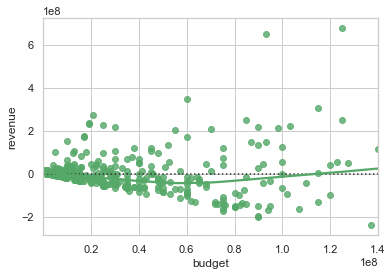

In [90]:
sns.set_theme(style="whitegrid")

sns.residplot(data=tmdb_revenue, x='budget', y='revenue', lowess=True, color="g")

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [115]:
cert_number = tmdb_revenue.groupby(['certification']).size().reset_index()
cert_number

,certification,0
0,G,13
1,NR,6
2,PG,29
3,PG-13,117
4,R,141


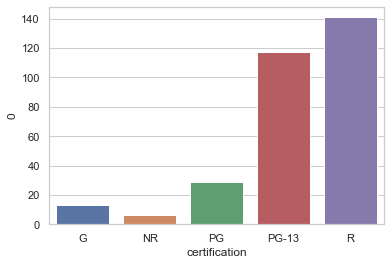

In [113]:
sns.barplot(data=cert_number, x='certification',y= 0 );

### What is the average revenue per certification category?

In [92]:
tmdb_revenue.groupby(['certification']).revenue.mean()

certification
G       133216881.69
NR       23823316.00
PG      134613828.03
PG-13   110577060.77
R        52966910.22
Name: revenue, dtype: float64

https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results

In [93]:
 pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [94]:
tmdb_revenue.groupby(['certification']).revenue.mean()

certification
G       133216881.69
NR       23823316.00
PG      134613828.03
PG-13   110577060.77
R        52966910.22
Name: revenue, dtype: float64

In [116]:
cert_mean_rev = tmdb_revenue.groupby(['certification']).revenue.mean().reset_index()
cert_mean_rev

,certification,revenue
0,G,133216881.69
1,NR,23823316.00
2,PG,134613828.03
3,PG-13,110577060.77
4,R,52966910.22


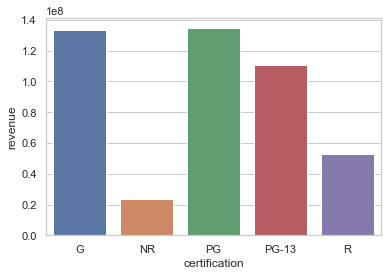

In [117]:
sns.barplot(data=cert_mean_rev, x='certification',y= 'revenue' );

### What is the average budget per certification category?

In [95]:
tmdb_revenue.groupby(['certification']).budget.mean()

certification
G       44000000.00
NR      14783333.33
PG      53741379.62
PG-13   46806815.27
R       27419557.06
Name: budget, dtype: float64

In [118]:
cert_mean_bud = tmdb_revenue.groupby(['certification']).budget.mean().reset_index()
cert_mean_bud

,certification,budget
0,G,44000000.00
1,NR,14783333.33
2,PG,53741379.62
3,PG-13,46806815.27
4,R,27419557.06


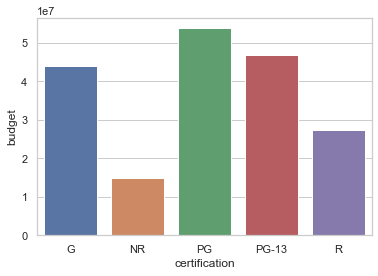

In [124]:
sns.barplot(data=cert_mean_bud, x='certification',y= 'budget' );

In [96]:
final_tmdb_concat.to_csv(f"Data/tmdb_results_combined.csv.gz", compression="gzip", index=False)